In [16]:
# Determining Max `number_of_new_images` for Image Augmentation 

In [17]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker

utah = pd.read_csv("~/Downloads/UtahHouseScore1.csv")
utah_images = pd.read_csv("~/Downloads/utah_house_score1.csv")
utah.head()
list(utah.columns)
numeric = pd.concat([utah_images.iloc[:99], utah[['sq_ft', 'bedrooms', 'bathrooms', 'patios',]]], axis=1)
numeric.head()
numeric.to_csv('~/workspace/data-science-scripts/jjohnson/num_cols.csv')

category = pd.concat([utah_images.iloc[:99], utah[['sq_ft', 'school_district', 'elementary', 'jr_high', 'high_school']]], axis=1)
category.to_csv('~/workspace/data-science-scripts/jjohnson/category_cols.csv')

text = pd.concat([utah_images.iloc[:99], utah[['sq_ft', 'description', 'garage_type', 'amenities', 'heating']]], axis=1)
text.to_csv("~/workspace/data-science-scripts/jjohnson/text_cols.csv")

#super wide 20000
#wide_text = pd.concat([utah_images.iloc[:99], np.random.randchar ])

geo = pd.concat([utah_images.iloc[:99], utah[['sq_ft', 'zip_geometry', 'latitude', 'longitude']]], axis=1)
geo['zip_geo2'] = geo['zip_geometry']
geo.to_csv("~/workspace/data-science-scripts/jjohnson/geo_cols.csv")

# geo max width: 500

images = utah_images.copy()
geo = pd.concat([utah_images.iloc[:99], utah[['sq_ft']]], axis=1)
images['img2'] = images['image']
images['img3'] = images['image']
images['img4'] = images['image']
images['img5'] = images['image']
images.to_csv('~/workspace/data-science-scripts/jjohnson/image_cols.csv')

mixed = pd.concat([utah_images.iloc[:99], utah.copy()], axis=1)
mixed.to_csv("~/workspace/data-science-scripts/jjohnson/mixed.csv")

In [18]:
#pd.DataFram(np.random.BitGenerator)
#df['NEW'] = pd.Series(random.choices(['yes','no'], weights=[1, 1], k=len(df), index=df.index)
#wide_text = pd.concat([utah_images.iloc[:99], np.random.randchar ])
num_rows = 99
num_columns = 99
text_data = np.array([pd.util.testing.rands_array(28,num_columns) for i in range(num_rows)]).reshape(num_rows, -1)
text_data_df = pd.DataFrame(text_data)
#pd.util.testing.rands_array(28,99)
wide_text = pd.concat([utah_images.iloc[:99], text_data_df], axis=1)
wide_text.to_csv('~/workspace/data-science-scripts/jjohnson/wide_text_100.csv', index=False)

# wide numeric
#wide_text = pd.concat([utah_images.iloc[:99], np.random.randchar ])
#random_num_df = pd.DataFrame(np.random.randint(0,10000, size=(99,97)))
#wide_numeric = pd.concat([utah_images.iloc[:99], random_num_df], axis=1)
#wide_numeric.head()
#wide_numeric.to_csv("~/Workspace/data-science-scripts/jjohnson/wide_numeric_100.csv")

In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#utah = pd.read_csv("~/Downloads/Utah-250.csv")


# Data is leaderboard exports of Imange Tunning Yaml run through shrink.
hundred = pd.read_csv("./100x.csv")
fivehundred = pd.read_csv("500x.csv")
twentyfive = pd.read_csv("25x.csv")
ten = pd.read_csv("10x.csv")
five = pd.read_csv("5x.csv")
mixed_750 = pd.read_csv("~/Downloads/img_aug_mixed_ds_x750_lb.csv")
mixed_500 = pd.read_csv("~/Downloads/img_aug_mixed_ds_x500_lb_good.csv")
mixed_1250 = pd.read_csv("~/Downloads/img_aug_mixed_ds_x1250_lb_good.csv")
mixed_2000 = pd.read_csv("~/Downloads/img_aug_mixed_ds_x2000_oom_lb.csv")
wide = pd.read_csv("~/Downloads/wide_numerical_lb.csv")
wide_text = pd.read_csv("~/Downloads/wide_text_ds_lb_res.csv")


In [20]:
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
#pd.set_option('display.max_colwidth', 10000)

# combine them all and use total images moving forward
#all_data = pd.concat([five, ten, twentyfive, hundred, fivehundred, mixed_750], axis=0)
mixed_500['multiplier'] = 500
mixed_750['multiplier'] = 750
mixed_1250['multiplier'] = 1250
mixed_2000['multiplier'] = 2000
wide['multiplier'] = 1000
wide_text['multiplier'] = 334
all_data = pd.concat([mixed_500, mixed_1250, mixed_750, mixed_2000, wide, wide_text], axis=0)

# ram usage stats
all_data['Max RAM GB'] = all_data['Max_RAM'] / 1000000000
all_data['total images'] = all_data['dataset_x_image'] * all_data['Sample_Size'] * all_data['multiplier']
all_data['Sample_Rows'] = all_data['Sample_Size'] * all_data['multiplier']
base_gb = 6.121353
base_rows = 80000
base_line = base_gb/base_rows * 1000000000
all_data['ram_diff_per_row'] = (all_data['Max_RAM'] / all_data['Sample_Rows']) - base_line
all_data['ram_per_row'] = (all_data['Max_RAM'] / all_data['Sample_Rows'] / 1000)
all_data['ram_per_col'] = all_data['ram_per_row'] / (all_data['dataset_x_cols'] - 1)

# existing predictions
all_data['predicted_ram'] = all_data['Sample_Rows'] * 0.00021074286756259003
all_data['col_val'] = (all_data['Max RAM GB'] - all_data['predicted_ram']) / all_data['Sample_Rows'] / (all_data['dataset_x_cols'] -1)
all_data['diff_ram'] = all_data['predicted_ram'] - all_data['Max RAM GB']

#all_data['total images'].update(all_data.pop('max total images'))

# the assumption is that final task and network type will have a large effect
# so pul those out for graphing purpose
main_tasks =all_data.main_task.unique()
main_tasks_dict = dict( zip(main_tasks, range(1, len(main_tasks) + 1)))
all_data['main_task_int'] = all_data.main_task.apply(lambda x: main_tasks_dict[x])

all_data['network_type'] = all_data.Blueprint.str.extract('net=([^;]*)', expand=False)
all_data['network_type'] = all_data['network_type'].fillna('None')
net_types = all_data['network_type'].unique()
net_types_dict = dict( zip(net_types, range(1, len(net_types) +1)))
all_data['network_type_int'] = all_data.network_type.apply(lambda x: net_types_dict[x])

# lets categories the data as image, geo, multi, etc..


In [21]:

# leaderboard export of failed runs won't have MAX RAM GB
valid_ram_data = all_data[all_data['Max RAM GB'] > 0]
valid_ram_data = valid_ram_data.sort_values(by=['Max RAM GB'], ascending=False)

# filter total amount of data, for better visibility (currently to keep graphs as same scale)
#valid_ram_data = valid_ram_data[valid_ram_data['total images'] < 1000000]

# mobilenet shows two distintive trend lines for memory use (graphs below)
# to determine what was different between the two trends I split them so I could let DR
# train for `high_mem_usage` and tell me why the difference
valid_ram_data['images_per_GB'] = valid_ram_data['total images'] / valid_ram_data['Max RAM GB']
valid_ram_data['high_mem_usage'] = valid_ram_data['images_per_GB'] < 11000
valid_ram_data.index = range(len(valid_ram_data))


# I want to use word cloud for the blueprint field, so this string manipulations were done
# iteratively to filter out noise in the word cloud
# remove uuid
valid_ram_data["Blueprint"] = valid_ram_data["Blueprint"].str.replace(r'[0-9a-f]{24}','', regex=True)
# SCPICK ids
valid_ram_data["Blueprint"] = valid_ram_data["Blueprint"].str.replace(r"cn=[0-9a-f]+\'",'', regex=True)
# try to seperate paramets into things DR will tokenize
valid_ram_data["Blueprint"] = valid_ram_data["Blueprint"].str.replace(';',' ')
valid_ram_data["Blueprint"] = valid_ram_data["Blueprint"].str.replace('.', '_')
valid_ram_data["Blueprint"] = valid_ram_data["Blueprint"].str.replace('=','oo')
# remove dense array data for LR1 as it signals LR1 anyways, and this will cleanup the word cloud
valid_ram_data["Blueprint"] = valid_ram_data["Blueprint"].str.replace(r'Coo\[.*\]', 'dense_array_data', regex=True)

# add categories based on file name
valid_ram_data.Filename = pd.Categorical(valid_ram_data.Filename)
valid_ram_data['cat_code'] = valid_ram_data.Filename.cat.codes

# break up the data into networks
squeezenet = 'netoosqueezenet'
efficientnet = 'netooefficientnet'
mobilenet = 'netoomobilenet'

mobilenet_data = valid_ram_data[valid_ram_data['Blueprint'].str.contains(mobilenet)]
efficientnet_data = valid_ram_data[valid_ram_data['Blueprint'].str.contains(efficientnet)]
squeezenet_data = valid_ram_data[valid_ram_data['Blueprint'].str.contains(squeezenet)]


valid_ram_data[['cat_code', 'Filename']]


<ipython-input-21-e9d41b9ac82e>:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  valid_ram_data["Blueprint"] = valid_ram_data["Blueprint"].str.replace('.', '_')


,cat_code,Filename
0,11,wide_numeric_10k.csv
1,11,wide_numeric_10k.csv
2,2,image_cols.csv
3,11,wide_numeric_10k.csv
4,2,image_cols.csv
...,...,...
1314,3,mixed.csv
1315,4,num_cols.csv
1316,9,text_cols.csv
1317,4,num_cols.csv


In [22]:
# export to use in DR
valid_ram_data.to_csv("valid_ram_data.csv")
no_squeeze = valid_ram_data[~valid_ram_data['Blueprint'].str.contains(squeezenet)]
no_squeeze.to_csv("no_squeeze_blueprint_not_id_valid_ram_data.csv")
mobile_net_only = no_squeeze[~no_squeeze['Blueprint'].str.contains(efficientnet)]
mobile_net_only.to_csv("mobilenet_valid_ram_data.csv")
#all_data.to_csv("all_data.csv")

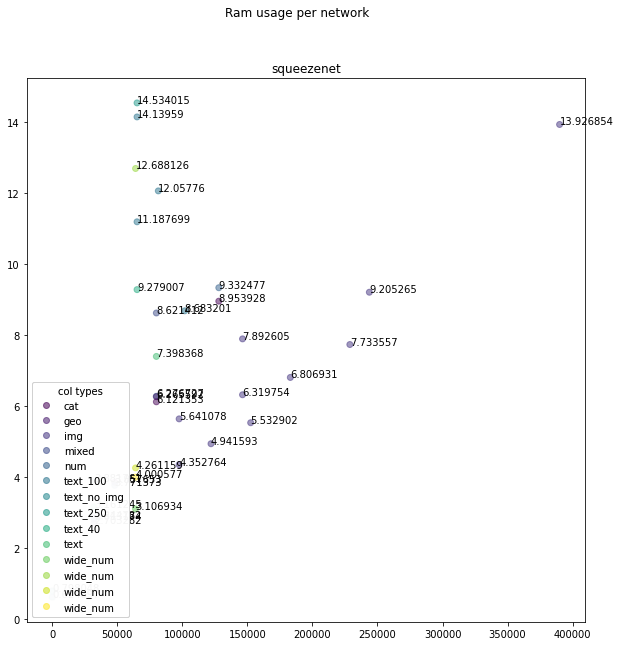

In [23]:

# graph by network, and split tasks by main_task inorder to find what network / task is the most greedy memory wise
# if we can prevent that combination from OOMing then we will prevent all combinations, this allows us to keep
# the metric (number_of_new_images) project based, otherwise I feel like we would need to do it for each (group) model

# The graphs seemed to show that mobilenet with SGDC is the algorithm to hit 60GB of memory with the least amount of
# images
# graph is Max Ram vs Main Task code, size of dots is the number of images in the dataset.

def plot_data(valid_ram_data, axis, title, color='red'):
    #valid_ram_data = valid_ram_data[valid_ram_data['total images'] == 168.0]
    scatter = axis.scatter(valid_ram_data['total images'], #valid_ram_data['size_factor'], 
            valid_ram_data['Max RAM GB'], 
            c=valid_ram_data.Filename.cat.codes,
            #s=valid_ram_data['total images'],
            alpha=0.5)
    axis.set_title(title)
    # annotate points in axis
    for idx, row in valid_ram_data.iterrows():
        axis.annotate(row['Max RAM GB'], (row['total images'], row['Max RAM GB']) )
    
    @ticker.FuncFormatter
    def get_dstype_name(x, pos):
        dstypes =['cat', 'geo', 'img', 'mixed', 'num', 'text_100', 'text_no_img', 'text_250', 'text_40', 'text', 'wide_num', 'wide_num', 'wide_num', 'wide_num']
        return dstypes[x.astype(int)]

    # produce a legend with the unique colors from the scatter
    legend1 = axis.legend(*scatter.legend_elements(fmt=get_dstype_name),
                        loc="lower left", title="col types")
    axis.add_artist(legend1)

fig, axs = plt.subplots(1)
fig.suptitle("Ram usage per network")
keras_data = valid_ram_data[valid_ram_data["main_task"] == "KERASR"]
plot_data(keras_data, axs, "squeezenet")
#plot_data(efficientnet_data, axs[1], "efficientnet")
#plot_data(mobilenet_data, axs[2], "mobilenet")



fig = plt.gcf()
fig.set_size_inches(10,10, forward=True)
plt.show()

In [40]:
#temp_data = valid_ram_data[valid_ram_data["main_task"] == "ENETCD"]
# numeric column mem amount = 0.001389586876
#num_col_factor = 0.001389586876
# include rows
num_col_factor = 0.000000021712295
# text column mem amount = 0.00413907
#txt_col_factor = 0.00413907
# include rows
txt_col_factor = 0.000000063550898
valid_ram_data['new_prediction'] = (valid_ram_data['predicted_ram'] + (valid_ram_data['dataset_x_txt'] * txt_col_factor * valid_ram_data['Sample_Rows']) +
                                    (valid_ram_data['dataset_x_numeric'] * num_col_factor * valid_ram_data['Sample_Rows']))


temp_data = valid_ram_data
cols =['Max RAM GB', 'new_prediction',  'predicted_ram', 'diff_ram', 'dataset_x_cols', 'dataset_x_image',
       'dataset_x_cat', 'dataset_x_txt', 'dataset_x_numeric',
       'Sample_Rows', 'ram_per_row', 'ram_per_col', 'ram_diff_per_row', 'col_val']
temp_data[cols].sort_values(by='diff_ram', ascending=True)[:20]

,Max RAM GB,new_prediction,predicted_ram,diff_ram,dataset_x_cols,dataset_x_image,dataset_x_cat,dataset_x_txt,dataset_x_numeric,Sample_Rows,ram_per_row,ram_per_col,ram_diff_per_row,col_val
0,27.379324,27.380633,13.487544,-13.891780,9998,1,0,0,9998,64000.0,427.801938,0.042793,351285.025000,2.171242e-08
1,25.534189,27.380633,13.487544,-12.046645,9998,1,0,0,9998,64000.0,398.971703,0.039909,322454.790625,1.882853e-08
3,20.855113,27.380633,13.487544,-7.367569,9998,1,0,0,9998,64000.0,325.861141,0.032596,249344.228125,1.151528e-08
7,14.534015,14.761865,13.725683,-0.808332,251,1,0,250,1,65130.0,223.153923,0.892616,146637.010423,4.964422e-08
8,14.139590,14.141004,13.725683,-0.413907,101,1,0,100,1,65130.0,217.097958,2.170980,140581.045430,6.355090e-08
10,12.688126,27.380633,13.487544,0.799418,9998,1,0,0,9998,64000.0,198.251969,0.019831,121735.056250,-1.249465e-09
12,12.672763,14.141004,13.725683,1.052920,101,1,0,100,1,65130.0,194.576432,1.945764,118059.519252,-1.616644e-07
13,12.619011,14.141004,13.725683,1.106672,101,1,0,100,1,65130.0,193.751129,1.937511,117234.216012,-1.699174e-07
14,12.467229,14.141004,13.725683,1.258454,101,1,0,100,1,65130.0,191.420682,1.914207,114903.769213,-1.932219e-07
15,12.390252,14.141004,13.725683,1.335431,101,1,0,100,1,65130.0,190.238784,1.902388,113721.871471,-2.050408e-07


In [25]:
base_line = 6.121353 #gb
rows = 168
actual = 6.265592
ram_diff = actual - base_line
ram_diff_row = ram_diff / 168
print("ram diff per row for geo is %s " % ram_diff_row)

ram diff per row for geo is 0.0008585654761904749 


In [26]:
# GB vs total images x final modeler x network

@ticker.FuncFormatter
def get_task_name(task_int, pos):
    for key, val in main_tasks_dict.items():
        if val == task_int:
            return key
    return task_int

def plot_data(valid_ram_data, axis, title, color='red'):
    scatter = axis.scatter(valid_ram_data.Filename.cat.codes,
            valid_ram_data['Max RAM GB'], 
            s=valid_ram_data['dataset_x_cols'],
            c=valid_ram_data['main_task_int'],
            label=valid_ram_data['main_task'],
            alpha=0.5)
    axis.set_title(title)
    
    legend1 = axis.legend(*scatter.legend_elements(prop='colors', fmt=get_task_name),
                    loc="best", title="Task Codes")
    axis.add_artist(legend1)

    axis.grid(True)
   

mobilenet_data.index = range(len(mobilenet_data))

#fig, axs = plt.subplots()
#plot_data(mobilenet_data, axs[0], "Mobilenet Pruned mem usage per image")
#plot_data(squeezenet_data, axs, "Squeezenet mem usage per image")
#plot_data(efficientnet_data, axs[2], "EfficientNet Pruned mem usage per image")


#fig = plt.gcf()
#fig.set_size_inches(18,6, forward=True)
#plt.show()


enet = squeezenet_data[squeezenet_data['main_task_int'] == 0]
enet.head()

,_id,Metablueprint,Blueprint,Sample_Size,Sample_Pct,Max_RAM,Task_Info_Extras,reference_model,quickrun_model,is_blender,...,ram_per_col,predicted_ram,col_val,diff_ram,main_task_int,network_type,network_type_int,images_per_GB,high_mem_usage,cat_code


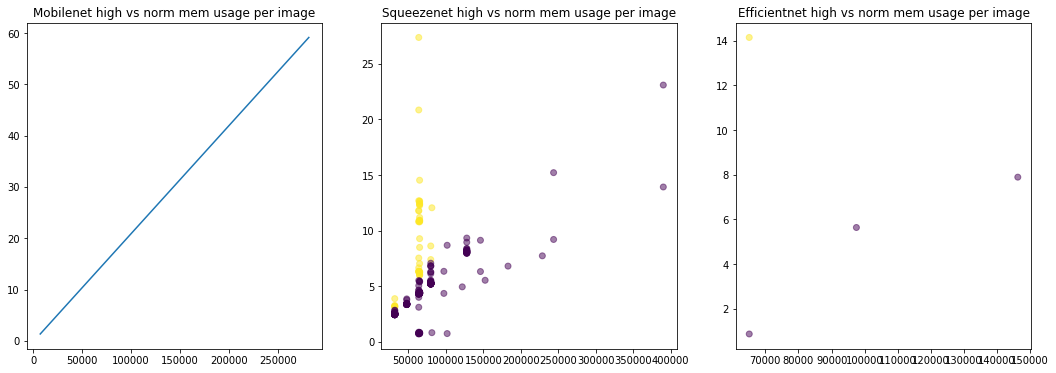

In [27]:
# Graph Max RAM GB vs number of rows, per network, split tick data into high_mem_usage (shown in yellow)
# and not high_mem_usage shown in purple

def plot_data(valid_ram_data, axis, title, color='red'):
    axis.scatter(valid_ram_data['total images'],
            valid_ram_data['Max RAM GB'], 
            c=valid_ram_data['high_mem_usage'],
            #s=valid_ram_data['dataset_x_cols'] * 50,
            alpha=0.5)
    axis.set_title(title)
   


fig, axs = plt.subplots(1,3)
plot_data(mobilenet_data, axs[0], "Mobilenet high vs norm mem usage per image")
# high_mem_mobilenet = mobilenet_data[mobilenet_data['high_mem_usage'] == True]
# axs[0].plot(high_mem_mobilenet['total images'], high_mem_mobilenet['Max RAM GB'])
# draw a line between max and min points
chosen_line = {'x': [7295.0, 281500.0], 'y': [1.333252, 59.120000]}
axs[0].plot(chosen_line['x'], chosen_line['y'])
# so limit equation is y=0.00021074286756259003x−0.20411721886909362
plot_data(squeezenet_data, axs[1], "Squeezenet high vs norm mem usage per image")
plot_data(efficientnet_data, axs[2], "Efficientnet high vs norm mem usage per image")


fig = plt.gcf()
fig.set_size_inches(18,6, forward=True)
plt.show()

In [28]:
mobilenet_data[mobilenet_data['high_mem_usage'] == True][['total images', 'Max RAM GB', 'dataset_x_cols']].sort_values(by="Max RAM GB", ascending=False)


,total images,Max RAM GB,dataset_x_cols


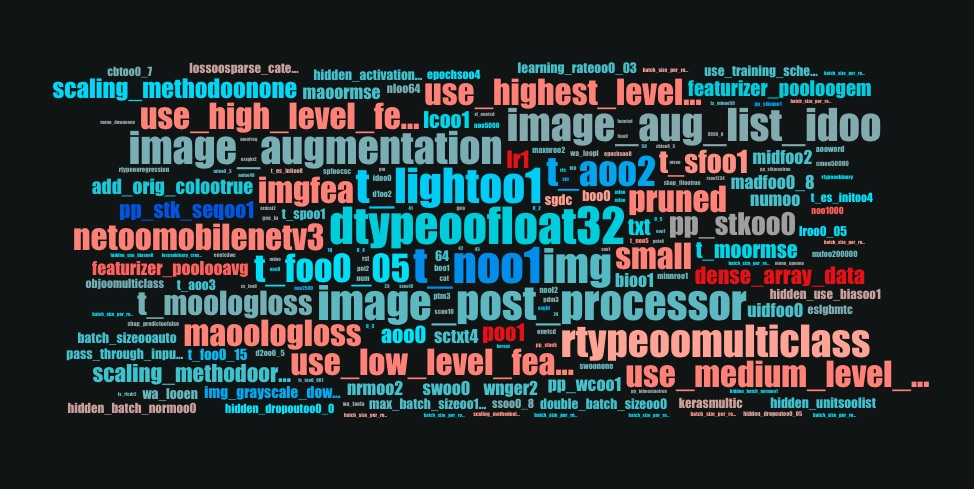

In [29]:
# so to explain what it takes to hit the yellow high mem target for Mobilenet, I ran several text models predicting
# `high_mem_usage` and looked at the word cloud...
# I manipulated the blueprint manually to get the word cloud to focus on different pices... removing information
# about the exact dense array used by `LR1` ... i.e. converting C=[<some dense array>] to `C=dense_array_data`
# then the word cloud looks like this:
# dense_array_data, lr1 and poo1 (originally p==1) are all proxy features for using the LR1 model, so that's the memory
# hog
from IPython.display import Image
Image(filename="LR1_word_cloud.jpg")


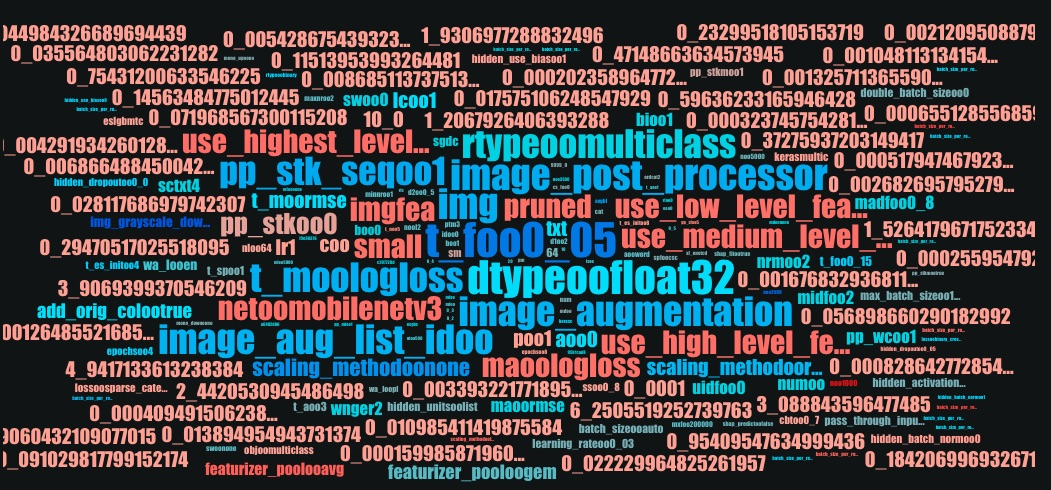

In [30]:
# zooming out a bit by including the dense_array_data in the blueprint field then ngrams with highes coef include
# (very small and hard to see):
# batch_size_per_tow ... which is a proxy for KERASMULTIC
# n=1000 ... number of trees I think so signifying a tree based model..
# and to a lesser degree, parameters about where to 

# the wordcloud data shows (similar as above graph(s)) that for mobilenet its the final modeler task code 
# in addition to total_number_images that predicts the memory used.
#
# the task codes that correspond to the much steeper memory use curve are:
# KERASMULTIC, LR1, ESLGBMTC, and SGDC
Image(filename="mobilenet_wordcloud.jpg")

In [31]:


# various phrases that word cloud showed having high positive coef
# `pp_sf` = stack fit it has coef of 1.0 for high_mem_usage... for image aug task we generally set it to 5
# `batch_size_per_row` = values seem to have a high coef with heavy memory use used in KERASMULTIC
# `t_n=5` == 5 CV folds which indicates more memory usage 
# n=1000   == number of trees I belive, used only in the two tree based models
